In [24]:
# All imports
from glob import glob
from tqdm import tqdm

import cv2
import matplotlib.pyplot as plt
import numpy as np

__DEBUG__= False

In [25]:
# Function for performing camera calibraation

def calibrate_camera(calib_img_dir,nb_x_corners,nb_y_corners):
    
    calib_img_paths = glob(calib_img_dir+'*.jpg')

    # Object points are 3-D integral coordinates of all internal corners
    # in a Chessboard image. The z coordinates are all zero.

    # The object points matrix has as many columns as there are x positions
    # and as many rows as there are y positions.

    x_coords,y_coords = np.meshgrid(range(nb_x_corners),range(nb_y_corners))
    z_coords = np.zeros(shape=[nb_y_corners,nb_x_corners])

    obj_points = np.dstack((x_coords,y_coords,z_coords))

    # Reshape the matrx of coordinates in to a list that has all coordinates
    # from left to right and top to bottom.
    obj_points = obj_points.reshape([-1,3])

    obj_points_list = []
    img_points_list = []

    detected = 0

    for path in tqdm(calib_img_paths):
        img = cv2.imread(path)
        grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(grey,(nb_x_corners,nb_y_corners))

        if ret == True:
            if __DEBUG__:
                cv2.drawChessboardCorners(img,(nb_x_corners,nb_y_corners),corners,ret)
                plt.imshow(img)
                plt.show()

            obj_points_list.append(obj_points)
            img_points_list.append(corners)

            detected += 1
            
    # Reshape object points and image points as required by the new OpenCV interface
    obj_points_matrix = np.array(obj_points_list).reshape([detected,-1,3])
    img_points_matrix = np.array(img_points_list).reshape([detected,-1,2])
    
    # Perform actual calibration using our object points and 
    # image points found above.
    retval, cameraMatrix, distCoeffs, rvecs, tvecs =\
    cv2.calibrateCamera(obj_points_matrix.astype(np.float32),
                        img_points_matrix.astype(np.float32),
                        (test_img.shape[1],test_img.shape[0]),
                        None,
                        None)
    
    return retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [26]:
# Camera calibration.

calib_img_dir = './camera_cal/'

# Number of internal corners in the calibration images.
# Obtained by manual inspection.
nb_x_corners = 9
nb_y_corners = 6

retval, cameraMatrix, distCoeffs, rvecs, tvecs = calibrate_camera(calib_img_dir,nb_x_corners,nb_y_corners)

100%|██████████| 20/20 [00:04<00:00,  4.23it/s]


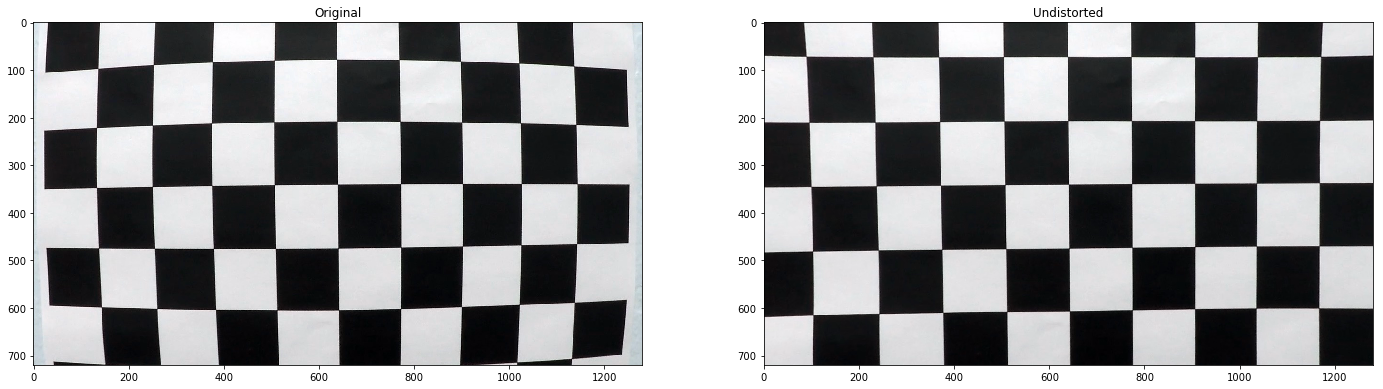

In [27]:
# Test distortion correction.
test_img = cv2.imread('camera_cal/calibration1.jpg')
undistorted = cv2.undistort(test_img,cameraMatrix,distCoeffs)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(24,9))

ax0.imshow(test_img)
ax0.set_title('Original')

ax1.imshow(undistorted)
ax1.set_title('Undistorted')

plt.show()
